In [11]:
# !pip install vis
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras import datasets, layers, models, preprocessing
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

ERROR! Session/line number was not unique in database. History logging moved to new session 617


In [6]:
model = tf.keras.models.load_model('../../data/Modelling/complex_model.h5')
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

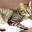

In [7]:
from PIL import Image
Image.open(open("../../data/Processed/cat1.png", 'rb'))

In [8]:
img = tf.keras.preprocessing.image.load_img("../../data/Processed/cat32new.png", target_size=(32, 32))
# convert to array
img = tf.keras.preprocessing.image.img_to_array(img)
# reshape into a single sample with 3 channels
img = img.reshape(1, 32, 32, 3)
# prepare pixel data
img = img.astype('float32')
img = img / 255.0

result = model.predict_classes(img)
print(result[0])
print(class_names[result[0]])

3
cat


In [9]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_12 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)       

In [ ]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


model.layers[-1].activation = None

print("conv2d_6")
last_conv_layer_name = "conv2d_6"

heatmap = make_gradcam_heatmap(img, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()
print("batch_normalization_6")
last_conv_layer_name = "batch_normalization_6"

heatmap = make_gradcam_heatmap(img, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()
print("conv2d_7")
last_conv_layer_name = "conv2d_7"

heatmap = make_gradcam_heatmap(img, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()
print("batch_normalization_7")
last_conv_layer_name = "batch_normalization_7"

heatmap = make_gradcam_heatmap(img, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()
print("max_pooling2d_3")
last_conv_layer_name = "max_pooling2d_3"

heatmap = make_gradcam_heatmap(img, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()
print("dropout_4")
last_conv_layer_name = "dropout_4"

heatmap = make_gradcam_heatmap(img, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()
print("conv2d_8")
last_conv_layer_name = "conv2d_8"

heatmap = make_gradcam_heatmap(img, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()
print("batch_normalization_8")
last_conv_layer_name = "batch_normalization_8"

heatmap = make_gradcam_heatmap(img, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()
print("max_pooling2d_4")
last_conv_layer_name = "max_pooling2d_4"

heatmap = make_gradcam_heatmap(img, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()
print("dropout_5")
last_conv_layer_name = "dropout_5"

heatmap = make_gradcam_heatmap(img, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()
print("conv2d_10")
last_conv_layer_name = "conv2d_10"

heatmap = make_gradcam_heatmap(img, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()
print("batch_normalization_10")
last_conv_layer_name = "batch_normalization_10"

heatmap = make_gradcam_heatmap(img, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()
print("conv2d_11")
last_conv_layer_name = "conv2d_11"

heatmap = make_gradcam_heatmap(img, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()
print("batch_normalization_11")
last_conv_layer_name = "batch_normalization_11"

heatmap = make_gradcam_heatmap(img, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

print("max_pooling2d_")
last_conv_layer_name = "max_pooling2d_5"

heatmap = make_gradcam_heatmap(img, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

print("dropout_6")
last_conv_layer_name = "dropout_6"

heatmap = make_gradcam_heatmap(img, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()







ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



conv2d_6
Traceback (most recent call last):
  File "C:\Users\yvi\anaconda3\envs\xai\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-8726d7884996>", line 41, in <module>
    heatmap = make_gradcam_heatmap(img, model, last_conv_layer_name)
  File "<ipython-input-10-8726d7884996>", line 5, in make_gradcam_heatmap
    [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
  File "C:\Users\yvi\anaconda3\envs\xai\lib\site-packages\tensorflow_core\python\keras\engine\network.py", line 548, in get_layer
    raise ValueError('No such layer: ' + name)
ValueError: No such layer: conv2d_6

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\yvi\anaconda3\envs\xai\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'ValueE

In [10]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_12 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)       

In [ ]:
heatmap = make_gradcam_heatmap(img, model, last_conv_layer_name, pred_index=1)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\yvi\anaconda3\envs\xai\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-11-4e25a6b4f7a1>", line 1, in <module>
    heatmap = make_gradcam_heatmap(img, model, last_conv_layer_name, pred_index=1)
  File "<ipython-input-10-8726d7884996>", line 5, in make_gradcam_heatmap
    [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
  File "C:\Users\yvi\anaconda3\envs\xai\lib\site-packages\tensorflow_core\python\keras\engine\network.py", line 548, in get_layer
    raise ValueError('No such layer: ' + name)
ValueError: No such layer: conv2d_6

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\yvi\anaconda3\envs\xai\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'Va

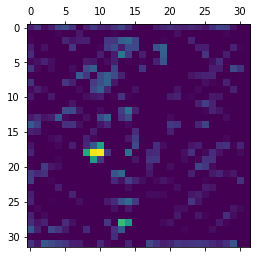

In [25]:
# Display heatmap
plt.matshow(heatmap)
plt.show()


In [10]:
import numpy as np
import shap

In [11]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
# select a set of background examples to take an expectation over
background = train_images[np.random.choice(train_images.shape[0], 100, replace=False)]

In [12]:
e = shap.DeepExplainer(model, background)

Using TensorFlow backend.
keras is no longer supported, please use tf.keras instead.


In [13]:
# ! pip install shap
import shap

In [14]:
e.shap_values

<bound method Deep.shap_values of <shap.explainers._deep.Deep object at 0x000001F83AD34D30>>

In [ ]:
shap_values= e.shap_values(train_images[2:12])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\yvi\anaconda3\envs\xai\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-7a885127e25f>", line 1, in <module>
    shap_values= e.shap_values(train_images[2:12])
  File "C:\Users\yvi\anaconda3\envs\xai\lib\site-packages\shap\explainers\_deep\__init__.py", line 124, in shap_values
    return self.explainer.shap_values(X, ranked_outputs, output_rank_order, check_additivity=check_additivity)
  File "C:\Users\yvi\anaconda3\envs\xai\lib\site-packages\shap\explainers\_deep\deep_tf.py", line 308, in shap_values
    sample_phis = self.run(self.phi_symbolic(feature_ind), self.model_inputs, joint_input)
  File "C:\Users\yvi\anaconda3\envs\xai\lib\site-packages\shap\explainers\_deep\deep_tf.py", line 365, in run
    return self.execute_with_overridden_gradients(anon)
  File "C:\Users\yvi\anaconda3\envs\xai\lib\site-packages\shap\explainers\_de

In [ ]:
shap.image_plot(shap_values, train_images[1:2])
shap.image_plot(shap_values, train_images[2:3])
shap.image_plot(shap_values, train_images[15:16])
shap.image_plot(shap_values, train_images[16:17])
shap.image_plot(shap_values, train_images[31:32])





ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\yvi\anaconda3\envs\xai\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-2440533333bb>", line 1, in <module>
    shap.image_plot(shap_values, train_images[1:2])
NameError: name 'shap_values' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\yvi\anaconda3\envs\xai\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\yvi\anaconda3\envs\xai\lib\site-packages\IPython\core\ultratb.py", line 1169, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "

In [16]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)